<a href="https://colab.research.google.com/github/santiagoruizs/newrep/blob/master/MachineLEarning/NeuralNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

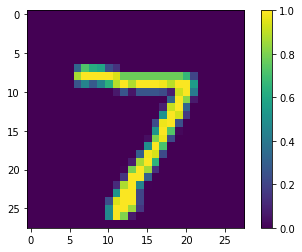

In [31]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()

model.add(Flatten(input_shape=(28, 28), name="flatten_1"))
model.add(Dense(128, activation='relu', name="dense_1"))
model.add(Dense(10, activation='softmax', name="dense_output"))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_output (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
epochs = 10
validation_split = 0.10

history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    validation_split=validation_split)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0926 - val_accuracy: 0.9805
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0972 - val_accuracy: 0.9780
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0878 - val_accuracy: 0.9822
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0957 - val_accuracy: 0.9805
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0899 - val_accuracy: 0.9815
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.1002 - val_accuracy: 0.9782
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.1025 - val_accuracy:

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9787
Test accuracy: 0.9786999821662903


In [29]:
predictions = model.predict(x_test)
print (predictions[0])

[7.3779096e-13 2.2436714e-14 1.3291071e-12 6.3498775e-09 2.8003166e-21
 2.1194706e-13 6.5689349e-21 9.9999988e-01 4.4823455e-12 1.5168050e-07]
